In [1]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#extracting files here

# Define paths to the files in Google Drive
zip_file_path1 = '/content/drive/My Drive/ISIC Files/ISIC-Test.zip'
zip_file_path2 = '/content/drive/My Drive/ISIC Files/ISIC-Training.zip'
zip_file_path3 = '/content/drive/My Drive/ISIC Files/ISIC-Validation.zip'

# Define the directory where you want to extract the files
extracted_dir_path1 = '/content/ISIC_Test'
extracted_dir_path2 = '/content/ISIC_Training'
extracted_dir_path3 = '/content/ISIC_Validation'

import zipfile
import os

# Function to extract a zip file
def extract_zip(zip_file_path, extracted_dir_path):
    if not os.path.isfile(zip_file_path):
        print(f"File not found: {zip_file_path}")
    elif not zipfile.is_zipfile(zip_file_path):
        print(f"File is not a zip file: {zip_file_path}")
    else:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_dir_path)
        print(f"Extracted {zip_file_path} to {extracted_dir_path}")

# Extract each zip file
extract_zip(zip_file_path1, extracted_dir_path1)
extract_zip(zip_file_path2, extracted_dir_path2)
extract_zip(zip_file_path3, extracted_dir_path3)


Extracted /content/drive/My Drive/ISIC Files/ISIC-Test.zip to /content/ISIC_Test
Extracted /content/drive/My Drive/ISIC Files/ISIC-Training.zip to /content/ISIC_Training
Extracted /content/drive/My Drive/ISIC Files/ISIC-Validation.zip to /content/ISIC_Validation


In [3]:
#extracting metadata

import pandas as pd

# Define the paths to the metadata files
metadata_file_path1 = '/content/drive/My Drive/ISIC Files/challenge-2017-test_metadata_2024-07-24.csv'
metadata_file_path2 = '/content/drive/My Drive/ISIC Files/challenge-2017-training_metadata_2024-07-24.csv'
metadata_file_path3 = '/content/drive/My Drive/ISIC Files/challenge-2017-validation_metadata_2024-07-24.csv'

# Read the metadata files
metadata_test = pd.read_csv(metadata_file_path1)
metadata_train = pd.read_csv(metadata_file_path2)
metadata_validation = pd.read_csv(metadata_file_path3)

# Print the columns of each metadata file
print("Test Metadata Columns:")
print(metadata_test.columns)

print("\nTraining Metadata Columns:")
print(metadata_train.columns)

print("\nValidation Metadata Columns:")
print(metadata_validation.columns)

# Define the directories where the metadata files should be saved
base_dir = '/content/'
train_dir = os.path.join(base_dir)
validation_dir = os.path.join(base_dir)
test_dir = os.path.join(base_dir)

# Save the metadata files to the respective directories
metadata_test.to_csv(os.path.join(test_dir, 'challenge-2017-test_metadata.csv'), index=False)
metadata_train.to_csv(os.path.join(train_dir, 'challenge-2017-training_metadata.csv'), index=False)
metadata_validation.to_csv(os.path.join(validation_dir, 'challenge-2017-validation_metadata.csv'), index=False)

print("\nMetadata files have been saved to the respective directories.")

Test Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'concomitant_biopsy',
       'dermoscopic_type', 'diagnosis', 'diagnosis_confirm_type', 'image_type',
       'lesion_id', 'melanocytic', 'nevus_type', 'patient_id', 'sex'],
      dtype='object')

Training Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis',
       'diagnosis_confirm_type', 'family_hx_mm', 'image_type', 'lesion_id',
       'melanocytic', 'nevus_type', 'patient_id', 'personal_hx_mm', 'sex'],
      dtype='object')

Validation Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis',
       'diagnosis_co

In [4]:
#cleaning up directories

import shutil
import os

# Define the function to clean up directories
def clean_up_directory(base_dir):
    # Iterate through all items in the base directory
    for item in os.listdir(base_dir):
        item_path = os.path.join(base_dir, item)
        # If the item is a directory
        if os.path.isdir(item_path):
            # Remove only the 'licenses' directory and other non-image directories
            if item == 'licenses' or item not in ['0', '1']:
                print(f"Removing directory: {item_path}")
                shutil.rmtree(item_path)
        elif os.path.isfile(item_path):
            # Remove files other than images (e.g., metadata or other files)
            if not item.lower().endswith(('.jpg', '.jpeg', '.png')):
                print(f"Removing file: {item_path}")
                os.remove(item_path)

# Define the directories
base_dir = '/content/'
train_dir = os.path.join(base_dir, 'ISIC_Training')
validation_dir = os.path.join(base_dir, 'ISIC_Validation')
test_dir = os.path.join(base_dir, 'ISIC_Test')

# Clean up train, validation, and test directories
clean_up_directory(train_dir)
clean_up_directory(validation_dir)
clean_up_directory(test_dir)

print("Directories cleaned up.")


Removing file: /content/ISIC_Training/attribution.txt
Removing directory: /content/ISIC_Training/licenses
Removing file: /content/ISIC_Training/metadata.csv
Removing file: /content/ISIC_Validation/attribution.txt
Removing directory: /content/ISIC_Validation/licenses
Removing file: /content/ISIC_Validation/metadata.csv
Removing file: /content/ISIC_Test/attribution.txt
Removing directory: /content/ISIC_Test/licenses
Removing file: /content/ISIC_Test/metadata.csv
Directories cleaned up.


In [5]:
#check metadata columns
print("Test Metadata Columns:")
print(metadata_test.columns)

print("\nTraining Metadata Columns:")
print(metadata_train.columns)

print("\nValidation Metadata Columns:")
print(metadata_validation.columns)


Test Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'concomitant_biopsy',
       'dermoscopic_type', 'diagnosis', 'diagnosis_confirm_type', 'image_type',
       'lesion_id', 'melanocytic', 'nevus_type', 'patient_id', 'sex'],
      dtype='object')

Training Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis',
       'diagnosis_confirm_type', 'family_hx_mm', 'image_type', 'lesion_id',
       'melanocytic', 'nevus_type', 'patient_id', 'personal_hx_mm', 'sex'],
      dtype='object')

Validation Metadata Columns:
Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'benign_malignant', 'clin_size_long_diam_mm',
       'concomitant_biopsy', 'dermoscopic_type', 'diagnosis',
       'diagnosis_co

In [6]:
#sort images into respective classes
import shutil
import os
import pandas as pd

# Function to create directories for each class
def create_class_directories(base_dir, classes):
    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

# Function to move images to corresponding class directories
def move_images_to_class_dirs(metadata, src_dir, dst_dir, label_column, id_column):
    for _, row in metadata.iterrows():
        class_name = '1' if row[label_column] == 'malignant' else '0'  # Convert benign/malignant to 0/1
        image_name = row[id_column] + '.jpg'  # Image ID
        src_path = os.path.join(src_dir, image_name)
        dst_path = os.path.join(dst_dir, class_name, image_name)
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)

# Read the metadata files
metadata_train = pd.read_csv(metadata_file_path2)
metadata_validation = pd.read_csv(metadata_file_path3)
metadata_test = pd.read_csv(metadata_file_path1)

# Columns for labels and image IDs
label_column = 'benign_malignant'
id_column = 'isic_id'

# Create class directories
classes = ['0', '1']
create_class_directories(train_dir, classes)
create_class_directories(validation_dir, classes)
create_class_directories(test_dir, classes)

# Move images to corresponding class directories
move_images_to_class_dirs(metadata_train, train_dir, train_dir, label_column, id_column)
move_images_to_class_dirs(metadata_validation, validation_dir, validation_dir, label_column, id_column)
move_images_to_class_dirs(metadata_test, test_dir, test_dir, label_column, id_column)

print("Images have been moved to corresponding class directories.")


Images have been moved to corresponding class directories.


In [7]:
#augmenting and preprocessing image data for training, validation, and testing of a binary classification model.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and iterate datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [19]:
#defining and compiling the deep learning model using MobileNetV2 as the base model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Freeze the base model
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
62/62 [==============================] - 170s 3s/step - loss: 0.5580 - accuracy: 0.7912 - val_loss: 0.5340 - val_accuracy: 0.7891
Epoch 2/10
62/62 [==============================] - 126s 2s/step - loss: 0.5323 - accuracy: 0.7988 - val_loss: 0.5015 - val_accuracy: 0.7812
Epoch 3/10
62/62 [==============================] - 129s 2s/step - loss: 0.4970 - accuracy: 0.8039 - val_loss: 0.4717 - val_accuracy: 0.7891
Epoch 4/10
62/62 [==============================] - 119s 2s/step - loss: 0.4886 - accuracy: 0.8079 - val_loss: 0.5006 - val_accuracy: 0.7656
Epoch 5/10
62/62 [==============================] - 127s 2s/step - loss: 0.4781 - accuracy: 0.8125 - val_loss: 0.4874 - val_accuracy: 0.7812
Epoch 6/10
62/62 [==============================] - 116s 2s/step - loss: 0.4601 - accuracy: 0.8100 - val_loss: 0.4779 - val_accuracy: 0.7734
Epoch 7/10
62/62 [==============================] - 127s 2s/step - loss: 0.4743 - accuracy: 0.8059 - val_loss: 0.4750 - val_accuracy: 0.7891
Epoch 8/10
62

In [21]:
#evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


19/19 [==============================] - 71s 4s/step - loss: 0.4673 - accuracy: 0.8083
Test Accuracy: 80.83%


19/19 [==============================] - 66s 3s/step
Accuracy: 0.8017
Precision: 0.3750
Recall: 0.0256
F1-score: 0.0480
ROC-AUC: 0.4978
Found 2000 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_3  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10
62/62 [==============================] - 127s 2s/step - loss: 0.7991 - accuracy: 0.5224 - val_loss: 0.5528 - val_accuracy: 0.7266
Epoch 

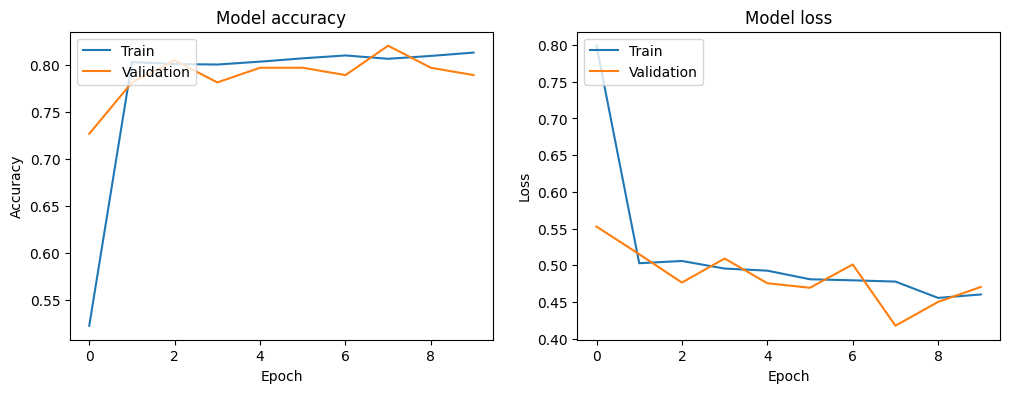

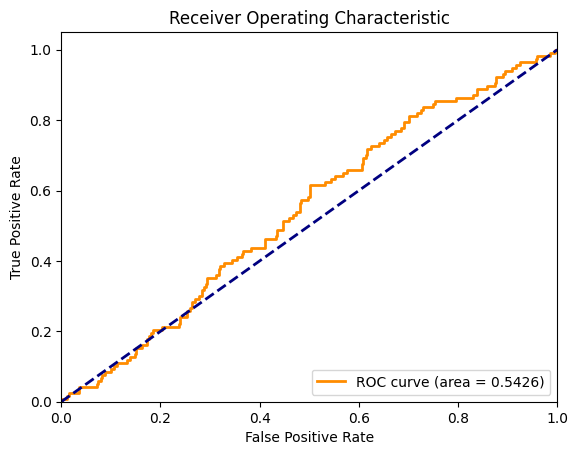

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predicting on the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Getting true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculating metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
roc_auc = roc_auc_score(true_classes, predictions)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')



import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import os

# Define paths based on your setup
train_dir = '/content/ISIC_Training'
validation_dir = '/content/ISIC_Validation'
test_dir = '/content/ISIC_Test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and iterate datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Define the model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Freeze the base model
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Predicting on the test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Getting true labels
true_classes = test_generator.classes

# Calculating metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
roc_auc = roc_auc_score(true_classes, predictions)

# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [26]:
#ResNet50 model

# Defining and compiling the ResNet50 model
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

base_model_resnet.trainable = False

model_resnet.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

model_resnet.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23589761 (89.99 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [27]:
#train the model

history_resnet = model_resnet.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

model_resnet.save('/content/melanoma_detection_resnet.h5')


Epoch 1/10
63/63 [==============================] - 298s 4s/step - loss: 0.8879 - accuracy: 0.1875 - val_loss: 0.7399 - val_accuracy: 0.2000
Epoch 2/10
63/63 [==============================] - 232s 4s/step - loss: 0.6538 - accuracy: 0.6650 - val_loss: 0.5893 - val_accuracy: 0.8000
Epoch 3/10
63/63 [==============================] - 233s 4s/step - loss: 0.5476 - accuracy: 0.8125 - val_loss: 0.5299 - val_accuracy: 0.8000
Epoch 4/10
63/63 [==============================] - 237s 4s/step - loss: 0.5065 - accuracy: 0.8125 - val_loss: 0.5089 - val_accuracy: 0.8000
Epoch 5/10
63/63 [==============================] - 233s 4s/step - loss: 0.4908 - accuracy: 0.8125 - val_loss: 0.5021 - val_accuracy: 0.8000
Epoch 6/10
63/63 [==============================] - 232s 4s/step - loss: 0.4858 - accuracy: 0.8125 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/10
63/63 [==============================] - 236s 4s/step - loss: 0.4842 - accuracy: 0.8125 - val_loss: 0.5002 - val_accuracy: 0.8000
Epoch 8/10
63

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


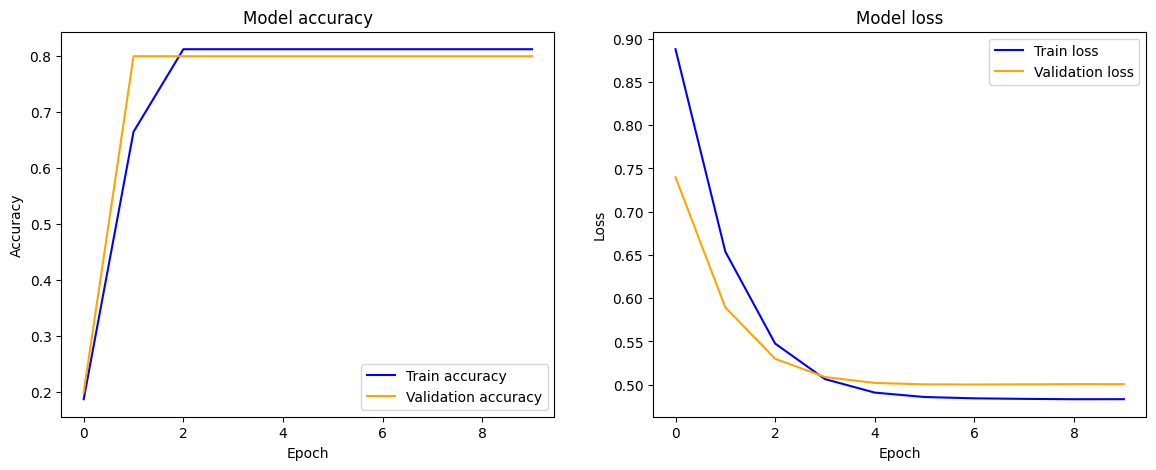

In [30]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy and loss
def plot_training_history(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # Plotting accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming 'history_resnet' contains the history object from the training process
plot_training_history(history_resnet)


In [28]:
#VGG16 model

# Defining and compiling the VGG16 model
from tensorflow.keras.applications import VGG16

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model_vgg = Sequential([
    base_model_vgg,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

base_model_vgg.trainable = False

model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_vgg.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_5  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [29]:
#train the model

history_vgg = model_vgg.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

model_vgg.save('/content/melanoma_detection_vgg.h5')


Epoch 1/10
63/63 [==============================] - 626s 10s/step - loss: 0.8585 - accuracy: 0.1980 - val_loss: 0.7901 - val_accuracy: 0.2267
Epoch 2/10
63/63 [==============================] - 578s 9s/step - loss: 0.7257 - accuracy: 0.3720 - val_loss: 0.6764 - val_accuracy: 0.5533
Epoch 3/10
63/63 [==============================] - 576s 9s/step - loss: 0.6325 - accuracy: 0.7535 - val_loss: 0.6043 - val_accuracy: 0.8000
Epoch 4/10
63/63 [==============================] - 573s 9s/step - loss: 0.5754 - accuracy: 0.8130 - val_loss: 0.5601 - val_accuracy: 0.8000
Epoch 5/10
63/63 [==============================] - 572s 9s/step - loss: 0.5378 - accuracy: 0.8125 - val_loss: 0.5340 - val_accuracy: 0.8000
Epoch 6/10
63/63 [==============================] - 578s 9s/step - loss: 0.5163 - accuracy: 0.8125 - val_loss: 0.5196 - val_accuracy: 0.8000
Epoch 7/10
63/63 [==============================] - 579s 9s/step - loss: 0.5023 - accuracy: 0.8125 - val_loss: 0.5120 - val_accuracy: 0.8000
Epoch 8/10
6

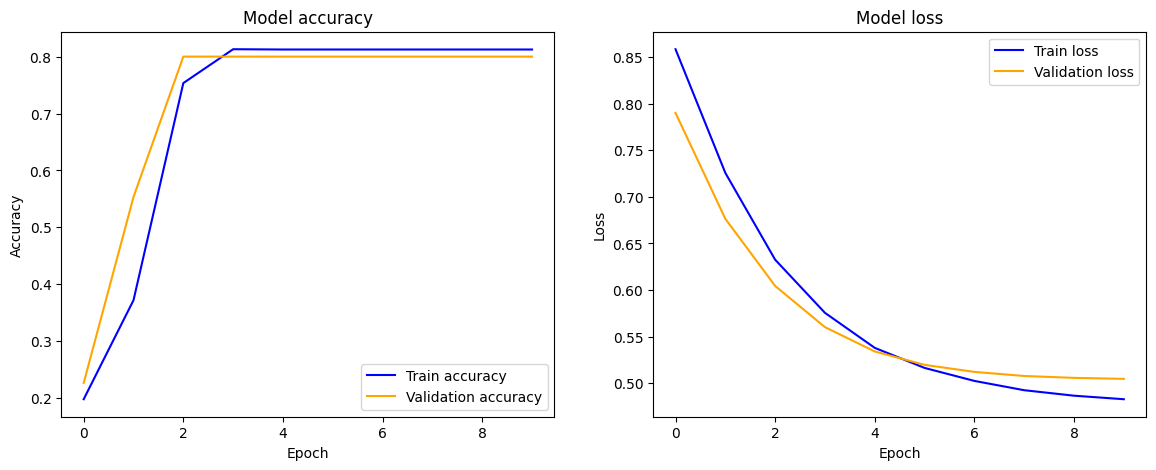

In [31]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # Plotting accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Train accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Train loss')
    plt.plot(epochs, val_loss, 'orange', label='Validation loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming 'history_vgg' contains the history object from the VGG16 training process
plot_training_history(history_vgg)
